In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt #for scatter
import random
import pandas as pd



Automatically created module for IPython interactive environment


In [2]:
!pip install yellowbrick

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

In [4]:
df = pd.read_csv('fifa20.csv')
data = pd.DataFrame()
data['overall']=df['overall']
data['wage_eur'] = df['wage_eur']

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002A973988898>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

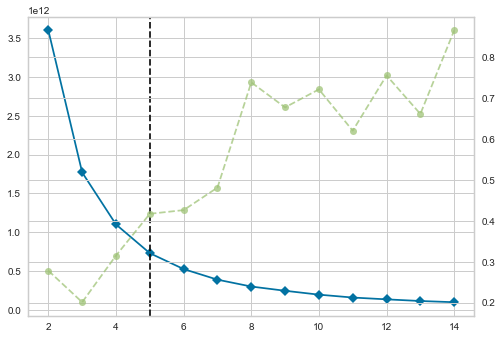

In [5]:
visualizer.fit(data)

In [6]:
# inisiasi k centroid dari dataset X
def init_centroid(X,k):
    n_sample= X.shape[0]
    point = random.sample(range(0, n_sample), k)
    centroid=[]
    for i in range(k):
        centroid.append(X[point[i]][:])
        
    return np.array(centroid)
#     unik_cent = list(set(centroid))
#     print(point)

In [7]:
def euc_distance(mtxA, mtxB):
    A_square = np.reshape(np.sum(mtxA * mtxA, axis=1), (mtxA.shape[0], 1))
    B_square = np.reshape(np.sum(mtxB * mtxB, axis=1), (mtxB.shape[0]), 1)
    AB = mtxA @ mtxB.T
    return np.sqrt(-2 * AB + B_square + A_square)
    

In [8]:
def get_cluster(X, cent, distance_method):
    k = cent.shape[0]
    cluster ={}
    
    dist_matrix = distance_method(X, cent)
    
    closest_cluster_ids = np.argmin(dist_matrix, axis=1)

    for i in range(k):
        cluster[i] = []

    for i, cluster_id in enumerate(closest_cluster_ids):
        cluster[cluster_id].append(X[i])

    return cluster
    

In [9]:
def cover_centroid(prev_cent, new_cent, dist_method, move_threshold):
    dist_prev_vs_new = dist_method(prev_cent, new_cent)
    covered_cent = np.max(dist_prev_vs_new.diagonal()) <= move_threshold
    
    return covered_cent

In [10]:
def kmeans(X, k, dist_method, move_threshold):
    new_cent = init_centroid(X=X, k=k)
    
    centroids_covered = False
    
    while not centroids_covered:
        prev_cent = new_cent
        clusters = get_cluster(X, prev_cent, dist_method)
        
        new_cent = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype)
                                  for key in sorted(clusters.keys())])
        centroids_covered = cover_centroid(prev_cent, new_cent, dist_method, move_threshold)
        
    return new_cent

<function matplotlib.pyplot.show(*args, **kw)>

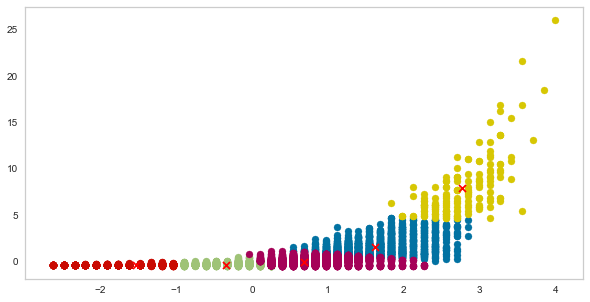

In [11]:

from sklearn.preprocessing import StandardScaler
dum = data
scaler = StandardScaler()
scal_data = scaler.fit_transform(dum)

centroids = kmeans(scal_data, k=5, dist_method=euc_distance, move_threshold=0.01)
clusters = get_cluster(scal_data, centroids, euc_distance)

plt.rcParams['figure.figsize'] = [10, 5]
for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)
    
    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="red")
plt.show    


In [73]:
points


array([[3.13032338, 4.70902745],
       [2.84254379, 3.72547295],
       [2.84254379, 2.78875438],
       ...,
       [0.68419685, 1.24316873],
       [0.68419685, 1.29000466],
       [0.54030705, 1.61785616]])

In [74]:
centroid

array([1.67933099, 1.77852584])

In [41]:
cp_data = np.array(data)
a=init_centroid(cp_data, 5)


# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
#               ('k_means_iris_3', KMeans(n_clusters=3)),
#               ('k_means_iris_4', KMeans(n_clusters=4))]

In [43]:
a

array([[    89, 370000],
       [    66,   5000],
       [    69,   4000],
       [    55,   1000],
       [    71,  11000]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


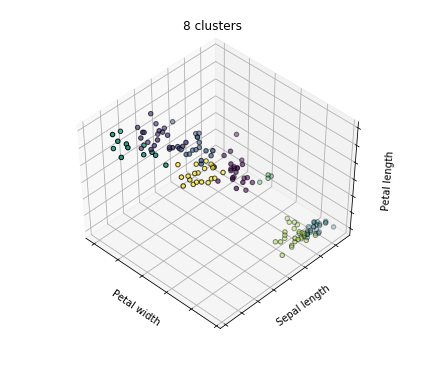

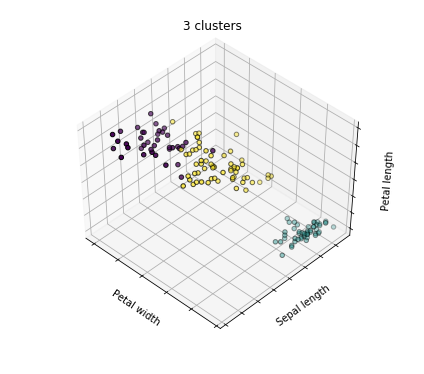

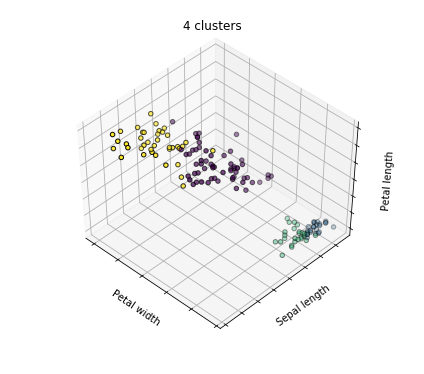

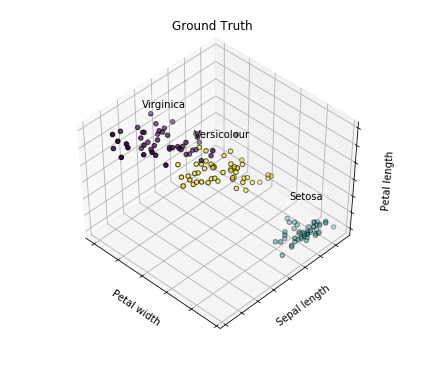

In [5]:
fignum = 1
titles = ['8 clusters', '3 clusters', '4 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [45]:
a = np.arange(6).reshape(2,3) + 10
a

array([[10, 11, 12],
       [13, 14, 15]])

In [46]:
np.argmin(a, axis=1)

array([0, 0], dtype=int64)

<class 'dict'>
